# Topic : Students Performance Analysis

Data taken from url - https://www.kaggle.com/spscientist/students-performance-in-exams/version/1

This data set consists of the marks secured by the students in various subjects.

In [1]:
%pylab inline
%matplotlib inline
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interactive,interact,fixed,interact_manual  #Getting all the necessary stuff imported

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('StudentsPerformance.csv') #Getting the data into this jupyter notebook

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Distribution of marks

Text(0, 0.5, 'Frequency')

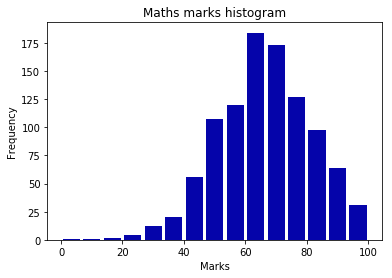

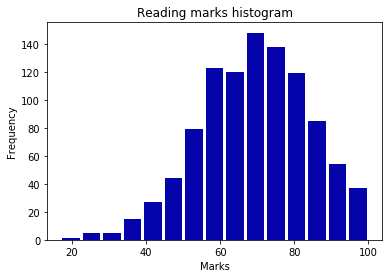

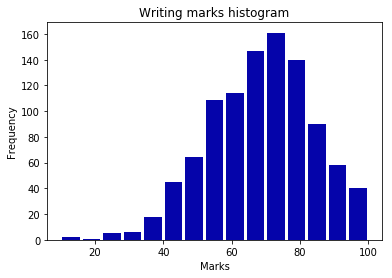

In [4]:
plt.hist(data['math score'],bins = 15,color='#0504aa',rwidth=0.85)
plt.title('Maths marks histogram')
plt.xlabel('Marks')
plt.ylabel('Frequency')

plt.figure()
plt.hist(data['reading score'],bins = 15,color='#0504aa',rwidth=0.85)
plt.title('Reading marks histogram')
plt.xlabel('Marks')
plt.ylabel('Frequency')

plt.figure()
plt.hist(data['writing score'],bins = 15,color='#0504aa',rwidth=0.85)
plt.title('Writing marks histogram')
plt.xlabel('Marks')
plt.ylabel('Frequency')

# Question 1 : How effective is the factor test preparation?

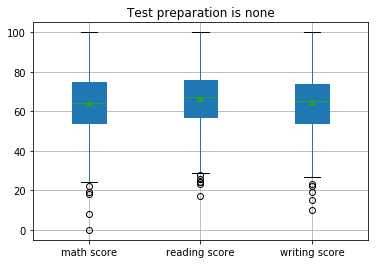

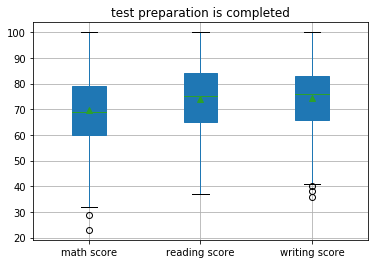

In [5]:
plt.title("Test preparation is none")
df1 = data[data['test preparation'] == 'none']
df1.boxplot(column = ['math score', 'reading score', 'writing score'], grid = True, patch_artist=True, showmeans=True)

plt.figure()
plt.title("test preparation is completed")
df1 = data[data['test preparation'] == 'completed']
df1.boxplot(column = ['math score', 'reading score', 'writing score'], grid = True, patch_artist=True, showmeans=True)

# Hypothesis Testing

In [7]:
def increase_in_marks_due_to_test_preparation(subject):
    print('Null Hypothesis = test preparation does not affect the',subject,'i.e. mu(',subject,'for completed preparation) = mu(',subject,'for none completed preparation)')
    print()
    print('Alternate Hypothesis = completed test preparation increases the',subject,'i.e. mu(',subject,'for completed preparation) > mu(',subject,'for none completed preparation)')
    print()
    
    avg_marks_for_completed_preparation = data[data['test preparation'] == 'completed'][subject].mean()
    std_marks_for_completed_preparation = data[data['test preparation'] == 'completed'][subject].std()
    numc = len(data[data['test preparation'] == 'completed'][subject])

    avg_marks_for_none_preparation = data[data['test preparation'] == 'none'][subject].mean()
    std_marks_for_none_preparation = data[data['test preparation'] == 'none'][subject].std()
    numn = len(data[data['test preparation'] == 'none'][subject])

    X_bar = np.average(avg_marks_for_completed_preparation) - np.average(avg_marks_for_none_preparation)
    var = ((numc-1)*(std_marks_for_completed_preparation ** 2) + (numn-1)*(std_marks_for_none_preparation ** 2))/998
    std = np.sqrt(var)

    t = X_bar/np.sqrt(var*((1/numc) + (1/numn)))
    print('t =',t)
    print()
    
    print('We have taken alpha to be 0.05, so as t > 1.96 so we can reject the null hypothesis and as t value is large so having test preparation completed can improve students scores.')
    
interact(increase_in_marks_due_to_test_preparation, subject = ['math score', 'reading score', 'writing score'])

interactive(children=(Dropdown(description='subject', options=('math score', 'reading score', 'writing score')…

<function __main__.increase_in_marks_due_to_test_preparation(subject)>

# Conclusion 

We got a t-value large enough so that we can reject the null hypothesis and it shows that students with completed test preparation tends to have more marks.

# Question 2 : Which major factors contribute to test outcomes?

# Comparision of average marks based on parental education

Average mark of students whose parents who finished till Schooling:- 65.10800744878958
Average mark of students whose parents finished till College:- 68.47640117994102
Average mark of students whose parents finished Associates degree:- 69.56906906906907
Average mark of students whose parents finished Bachelers degree:- 71.92372881355932
Average mark of students whose parents finished Masters degree:- 73.59887005649718


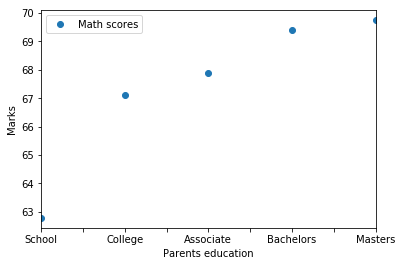

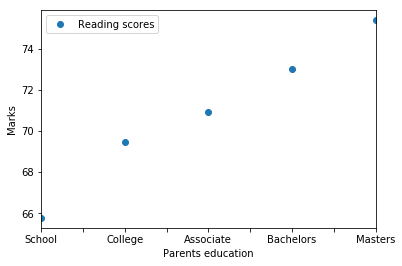

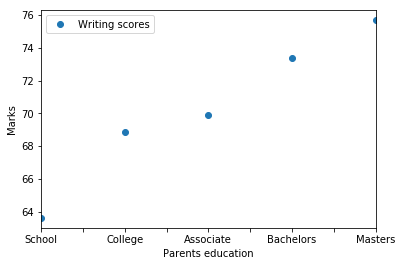

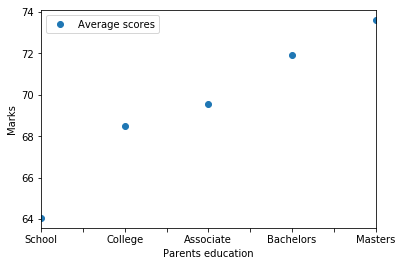

In [8]:
dataBmaster = data[data["parental level of education"] == "bachelor's degree"].drop(["gender","race/ethnicity","lunch","test preparation"],axis = 1)
Bmath =mean(dataBmaster["math score"])
Bread =mean(dataBmaster["reading score"])
Bwrite=mean(dataBmaster["writing score"])
Btotal=(Bread+Bmath+Bwrite)/3

dataMmaster = data[data["parental level of education"] == "master's degree"].drop(["gender","race/ethnicity","lunch","test preparation"],axis = 1)
Mmath =mean(dataMmaster["math score"])
Mread =mean(dataMmaster["reading score"])
Mwrite=mean(dataMmaster["writing score"])
Mtotal=(Mread+Mmath+Mwrite)/3

dataHschool = data[data["parental level of education"] == "high school"].drop(["gender","race/ethnicity","lunch","test preparation"],axis = 1)
Hmath =mean(dataHschool["math score"])
Hread =mean(dataHschool["reading score"])
Hwrite=mean(dataHschool["writing score"])
Htotal=(Hread+Hmath+Hwrite)/3

dataSschool = data[data["parental level of education"] == "some high school"].drop(["gender","race/ethnicity","lunch","test preparation"],axis = 1)
Smath =mean(dataSschool["math score"])
Sread =mean(dataSschool["reading score"])
Swrite=mean(dataSschool["writing score"])
Stotal=(Sread+Smath+Swrite)/3

dataCollege = data[data["parental level of education"] == "some college"].drop(["gender","race/ethnicity","lunch","test preparation"],axis = 1)
Cmath =mean(dataCollege["math score"])
Cread =mean(dataCollege["reading score"])
Cwrite=mean(dataCollege["writing score"])
Ctotal=(Cread+Cmath+Cwrite)/3

dataAdegree = data[data["parental level of education"] == "associate's degree"].drop(["gender","race/ethnicity","lunch","test preparation"],axis = 1)
Amath =mean(dataAdegree["math score"])
Aread =mean(dataAdegree["reading score"])
Awrite=mean(dataAdegree["writing score"])
Atotal=(Aread+Amath+Awrite)/3

a=len(dataHschool)
b=len(dataSschool)
SCmath=(a*Hmath+b*Smath)/(a+b)
SCread=(a*Hread+b*Sread)/(a+b)
SCwrite=(a*Hwrite+b*Swrite)/(a+b)
SCtotal=(a*Htotal+b*Stotal)/(a+b)

df=pd.DataFrame({'Parents education':['School','College','Associate','Bachelors','Masters'],'Math scores':[SCmath,Cmath,Amath,Bmath,Mmath]})
df.plot.line(x='Parents education',y='Math scores',rot=0,style='o')
plt.ylabel('Marks')

df=pd.DataFrame({'Parents education':['School','College','Associate','Bachelors','Masters'],'Reading scores':[SCread,Cread,Aread,Bread,Mread]})
df.plot.line(x='Parents education',y='Reading scores',rot=0,style='o')
plt.ylabel('Marks')

df=pd.DataFrame({'Parents education':['School','College','Associate','Bachelors','Masters'],'Writing scores':[SCwrite,Cwrite,Awrite,Bwrite,Mwrite]})
df.plot.line(x='Parents education',y='Writing scores',rot=0,style='o')
plt.ylabel('Marks')

df=pd.DataFrame({'Parents education':['School','College','Associate','Bachelors','Masters'],'Average scores':[SCtotal,Ctotal,Atotal,Btotal,Mtotal]})
df.plot.line(x='Parents education',y='Average scores',rot=0,style='o')
plt.ylabel('Marks')

print('Average mark of students whose parents who finished till Schooling:-',Stotal)
print('Average mark of students whose parents finished till College:-',Ctotal)
print('Average mark of students whose parents finished Associates degree:-',Atotal)
print('Average mark of students whose parents finished Bachelers degree:-',Btotal)
print('Average mark of students whose parents finished Masters degree:-',Mtotal)




# Comparision of average marks based on quality of lunch

Marks of students who consume free food 62.19906103286385
Marks of students who consume standard food 70.83720930232558


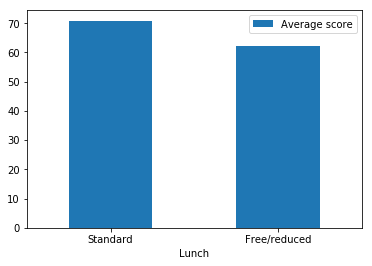

In [9]:
dataStandard = data[data["lunch"] == "standard"].drop(["gender","race/ethnicity","parental level of education","test preparation"],axis = 1)
Smath =mean(dataStandard["math score"])
Sread =mean(dataStandard["reading score"])
Swrite=mean(dataStandard["writing score"])
Stotal=(Sread+Smath+Swrite)/3
mu1=len(dataStandard)
std1=std(dataStandard["math score"])

dataFree = data[data["lunch"] == "free/reduced"].drop(["gender","race/ethnicity","parental level of education","test preparation"],axis = 1)
Fmath =mean(dataFree["math score"])
Fread =mean(dataFree["reading score"])
Fwrite=mean(dataFree["writing score"])
Ftotal=(Fread+Fmath+Fwrite)/3
b=len(dataFree)
std2=std(dataFree["math score"])

df=pd.DataFrame({'Lunch':["Standard","Free/reduced"],"Average score":[Stotal,Ftotal]})
df.plot.bar(x='Lunch',rot=0)

print("Marks of students who consume free food",Ftotal)
print("Marks of students who consume standard food",Stotal)

# Hypothesis testing

In [10]:
def effect_of_lunch_quality_on_marks(subject):
    print('Null Hypothesis = standard lunch does not affect the',subject,'i.e. mu(',subject,'for student taking standard lunch) = mu(',subject,'for student not taking standard lunch')
    print()
    print('Alternate Hypothesis = standard lunch increases the',subject,'i.e. mu(',subject,'for student taking standard lunch) > mu(',subject,'for student not taking standard lunch)')
    print()
    
    avg_marks_for_standard_lunch = data[data['lunch'] == 'standard'][subject].mean()
    std_marks_for_standard_lunch = data[data['lunch'] == 'standard'][subject].std()
    nums = len(data[data['lunch'] == 'standard'][subject])

    avg_marks_for_not_standard_lunch = data[data['lunch'] == 'free/reduced'][subject].mean()
    std_marks_for_not_standard_lunch = data[data['lunch'] == 'free/reduced'][subject].std()
    numf = len(data[data['lunch'] == 'free/reduced'][subject])


    X_bar = np.average(avg_marks_for_standard_lunch) - np.average(avg_marks_for_not_standard_lunch)
    var = ((nums-1)*(std_marks_for_standard_lunch ** 2) + (numf - 1)*(std_marks_for_not_standard_lunch ** 2))/998
    std = np.sqrt(var)


    t = X_bar/np.sqrt(var*((1/nums)+(1/numf)))
    print('t =',t)
    print()
    
    print('We have taken alpha to be 0.05, so as t > 1.96 so we can reject the null hypothesis and as t value is large so taking standard lunch can improve students scores.')
    
interact(effect_of_lunch_quality_on_marks, subject = ['math score', 'reading score', 'writing score'])

interactive(children=(Dropdown(description='subject', options=('math score', 'reading score', 'writing score')…

<function __main__.effect_of_lunch_quality_on_marks(subject)>

# Comparing average scores of the students based on student's preparation

In [11]:
grouped=data.groupby('test preparation')
PREPARED=grouped.get_group('completed')
maths_mean_prepared=PREPARED['math score'].agg(np.mean)
reading_mean_prepared=PREPARED['reading score'].agg(np.mean)
writing_mean_prepared=PREPARED['writing score'].agg(np.mean)
NOT_PREPARED=grouped.get_group('none')
maths_mean_not_prepared=NOT_PREPARED['math score'].agg(np.mean)
reading_mean_not_prepared=NOT_PREPARED['reading score'].agg(np.mean)
writing_mean_not_prepared=NOT_PREPARED['writing score'].agg(np.mean)

Text(0.5, 1.0, 'COMPARING AVERAGE MARKS OF STUDENTS WHO DID NOT PREPARE Vs WHO PREPARED BEFORE EXAMS')

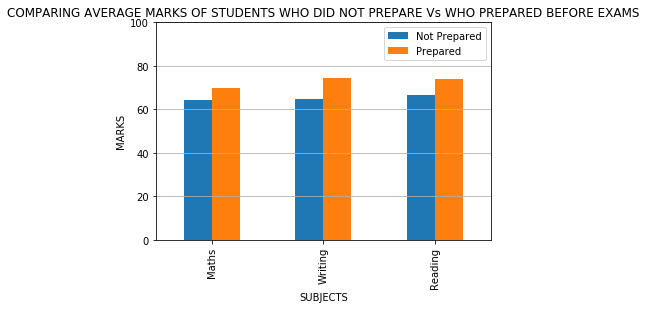

In [12]:
A = pd.DataFrame({'SUBJECTS':['Maths','Writing','Reading'], 'SCORE': [maths_mean_not_prepared,writing_mean_not_prepared,reading_mean_not_prepared]})
#A.set_index("SUBJECTS",drop=True,inplace=True)
B = pd.DataFrame({'SUBJECTS':['Maths','Writing','Reading'], 'SCORE': [maths_mean_prepared,writing_mean_prepared,reading_mean_prepared]})
#B.set_index("SUBJECTS",drop=True,inplace=True)
pd.concat({'Prepared':B.set_index("SUBJECTS").SCORE,'Not Prepared':A.set_index("SUBJECTS").SCORE},axis=1).plot.bar();
plt.ylim(0,100)
plt.ylabel('MARKS')
plt.grid(axis='y')
plt.title('COMPARING AVERAGE MARKS OF STUDENTS WHO DID NOT PREPARE Vs WHO PREPARED BEFORE EXAMS')


# Boxplot of scores of students of different race/ethnicity 

In [13]:
def boxplot_groupwise(group):
    
    df1 = data[data['race/ethnicity'] == group]
    df1.boxplot(column = ['math score', 'reading score', 'writing score'], patch_artist=True, showmeans=True)
    plt.ylabel('Percentile')
        
    
interact(boxplot_groupwise, group = ['group A', 'group B', 'group C', 'group D','group E'])

interactive(children=(Dropdown(description='group', options=('group A', 'group B', 'group C', 'group D', 'grou…

<function __main__.boxplot_groupwise(group)>

# Comparision of average marks based on race/ethnicity

Average mark of the students with Group A:- 62.99250936329588
Average mark of the students with Group B:- 65.46842105263157
Average mark of the students with Group C:- 67.13166144200626
Average mark of the students with Group D:- 69.1793893129771
Average mark of the students with Group E:- 72.75238095238096


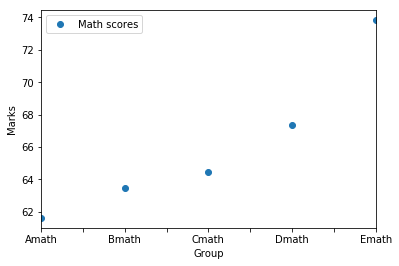

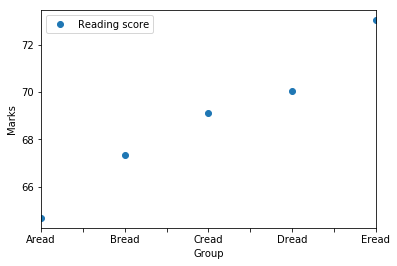

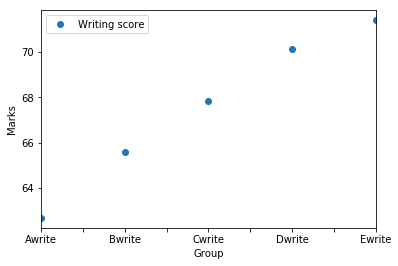

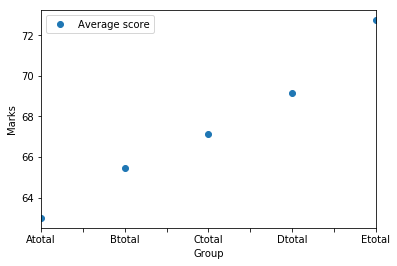

In [14]:
dataGroupA = data[data["race/ethnicity"] == "group A"].drop(["gender","lunch","parental level of education","test preparation"],axis = 1)
Amath =np.mean(dataGroupA["math score"])
Aread =np.mean(dataGroupA["reading score"])
Awrite=np.mean(dataGroupA["writing score"])
Atotal=(Aread+Amath+Awrite)/3

dataGroupB = data[data["race/ethnicity"] == "group B"].drop(["gender","lunch","parental level of education","test preparation"],axis = 1)
Bmath =np.mean(dataGroupB["math score"])
Bread =np.mean(dataGroupB["reading score"])
Bwrite=np.mean(dataGroupB["writing score"])
Btotal=(Bread+Bmath+Bwrite)/3

dataGroupC = data[data["race/ethnicity"] == "group C"].drop(["gender","lunch","parental level of education","test preparation"],axis = 1)
Cmath =np.mean(dataGroupC["math score"])
Cread =np.mean(dataGroupC["reading score"])
Cwrite=np.mean(dataGroupC["writing score"])
Ctotal=(Cread+Cmath+Cwrite)/3

dataGroupD = data[data["race/ethnicity"] == "group D"].drop(["gender","lunch","parental level of education","test preparation"],axis = 1)
Dmath =np.mean(dataGroupD["math score"])
Dread =np.mean(dataGroupD["reading score"])
Dwrite=np.mean(dataGroupD["writing score"])
Dtotal=(Dread+Dmath+Dwrite)/3

dataGroupE = data[data["race/ethnicity"] == "group E"].drop(["gender","lunch","parental level of education","test preparation"],axis = 1)
Emath =np.mean(dataGroupE["math score"])
Eread =np.mean(dataGroupE["reading score"])
Ewrite=np.mean(dataGroupE["writing score"])
Etotal=(Eread+Emath+Ewrite)/3

df=pd.DataFrame({'Group':["Amath","Bmath","Cmath","Dmath","Emath"],"Math scores":[Amath,Bmath,Cmath,Dmath,Emath]})
df.plot.line(x='Group',y="Math scores",rot=0,style='o')
plt.ylabel('Marks')

df=pd.DataFrame({'Group':["Aread","Bread","Cread","Dread","Eread"],"Reading score":[Aread,Bread,Cread,Dread,Eread]})
df.plot.line(x='Group',y="Reading score",rot=0,style='o')
plt.ylabel('Marks')

df=pd.DataFrame({'Group':["Awrite","Bwrite","Cwrite","Dwrite","Ewrite"],"Writing score":[Awrite,Bwrite,Cwrite,Dwrite,Ewrite]})
df.plot.line(x='Group',y="Writing score",rot=0,style='o')
plt.ylabel('Marks')

df=pd.DataFrame({'Group':["Atotal","Btotal","Ctotal","Dtotal","Etotal"],"Average score":[Atotal,Btotal,Ctotal,Dtotal,Etotal]})
df.plot.line(x='Group',y="Average score",rot=0,style='o')
plt.ylabel('Marks')

print("Average mark of the students with Group A:-",Atotal)
print("Average mark of the students with Group B:-",Btotal)
print("Average mark of the students with Group C:-",Ctotal)
print("Average mark of the students with Group D:-",Dtotal)
print("Average mark of the students with Group E:-",Etotal)


# Conclusion 

Factors which contributes to test scores are:
1. Race/ethinicity or the group from which the students belong.
2. Parental level of education.
3. The quality of lunch the students get.
4. Test preparation status.

# Thank you